# Họ và Tên: Hoàng Quốc Huy
# MSSV:2374802013575

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


[[28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]
 ...
 [27 27 27 ... 26 26 26]
 [27 26 26 ... 26 26 25]
 [27 27 26 ... 26 26 25]]


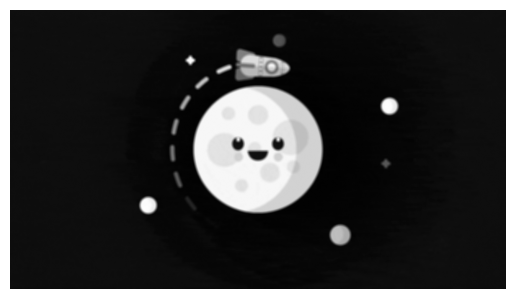

In [2]:
#Lọc ảnh với mean filter
import numpy as np
import scipy.ndimage as sn
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

# Đọc ảnh grayscale đúng cách
a = iio.imread('GIF.jpg', mode='F')

# Tạo kernel lọc trung bình 5x5
k = np.ones((5, 5)) / 25

# Áp dụng bộ lọc trung bình
b = sn.convolve(a, k).astype(np.uint8)

# Lưu ảnh đã lọc
iio.imwrite('bird_mean_filter.png', b)  # Sửa typo "meabn" → "mean"

# In và hiển thị ảnh
print(b)
plt.imshow(b, cmap='gray')  # Dùng cmap='gray' để hiển thị ảnh đúng màu
plt.axis('off')
plt.show()

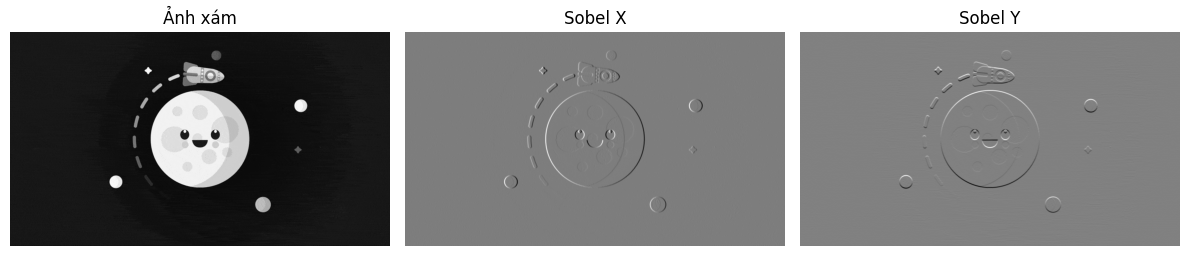

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio

# Đọc ảnh gốc và chuyển sang ảnh xám
a = cv2.imread('GIF.jpg')
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY) # Changed from cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) to use variable 'a'

# Áp dụng bộ lọc Sobel theo hướng X và Y
sobel_x = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)  # Biên theo chiều ngang # Changed from gray to b
sobel_y = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)  # Biên theo chiều dọc # Changed from gray to b

# Tính độ lớn gradient
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# Lưu ảnh kết quả
cv2.imwrite('bird_sobel_edges.jpg', sobel_magnitude)

# Hiển thị ảnh
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray') # Changed from gray to b
plt.title('Ảnh xám')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.tight_layout()
plt.show()

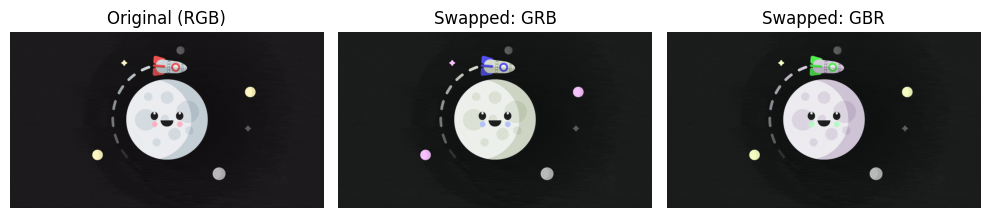

In [5]:
#* Đổi màu ảnh bằng cách hoán đổi thứ tự các
#kênh màu (ví dụ: BGR → GRB hoặc GBR...)
#và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh màu RGB
a = iio.imread('GIF.jpg')

# Hoán đổi RGB → GRB (tương đương với BGR → GRB nếu ảnh là BGR)
swapped_grb = a[:, :, [1, 2, 0]]  # R→G, G→B, B→R

# Hoán đổi RGB → GBR
swapped_gbr = a[:, :, [1, 0, 2]]  # R→G, G→R, B giữ nguyên

# Lưu ảnh với định dạng [tên ảnh]_swapped.jpg
iio.imwrite('GIF_swapped_grb.jpg', swapped_grb)
iio.imwrite('GIF_swapped_gbr.jpg', swapped_gbr)

# Hiển thị ảnh gốc và ảnh đã hoán đổi
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(a)
plt.title('Original (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(swapped_grb)
plt.title('Swapped: GRB')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(swapped_gbr)
plt.title('Swapped: GBR')
plt.axis('off')

plt.tight_layout()
plt.show()

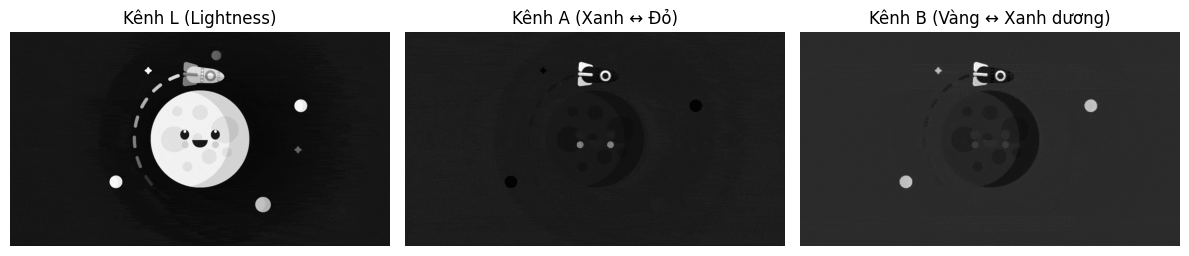

In [6]:
#Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B,
#lưu thành ảnh grayscale tương ứng ([ten_anh]_L.jpg, [ten_anh]_A.jpg, [ten_anh]_B.jpg). (0.5 điểm)
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh màu BGR
img = cv2.imread('GIF.jpg')

# Chuyển ảnh từ BGR sang không gian màu LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Tách các kênh L, A, B
L, A, B = cv2.split(lab)

# Lưu các kênh dưới dạng ảnh grayscale
cv2.imwrite('GIF_L.jpg', L)
cv2.imwrite('GIF_A.jpg', A)
cv2.imwrite('GIF_B.jpg', B)

# Hiển thị ảnh từng kênh
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(L, cmap='gray')
plt.title('Kênh L (Lightness)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(A, cmap='gray')
plt.title('Kênh A (Xanh ↔ Đỏ)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('Kênh B (Vàng ↔ Xanh dương)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


========== MENU LỌC ẢNH ==========
B - Gaussian Blur
M - Median Blur
F - Bilateral Filter
E - Canny Edge Detection
R - Erosion
D - Dilation
 Nhập lựa chọn của bạn : b

 Đã lưu: result_blur3_London.jpg

 Ảnh gốc: London.jpg


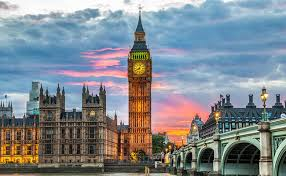

 Ảnh sau xử lý (blur3):


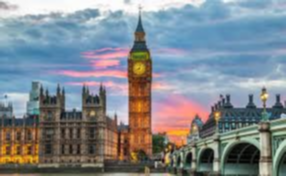


 Đã lưu: result_blur9_TPHCM.jpg

 Ảnh gốc: TPHCM.jpg


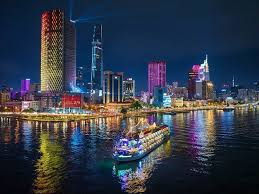

 Ảnh sau xử lý (blur9):


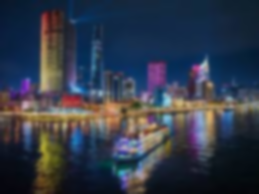


 Đã lưu: result_blur7_Vietnam.jpg

 Ảnh gốc: Vietnam.jpg


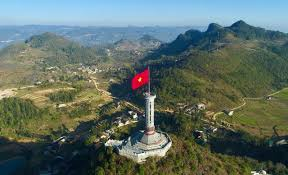

 Ảnh sau xử lý (blur7):


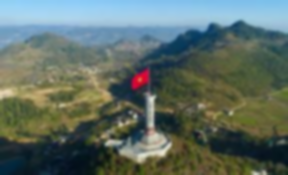


 Đã hoàn thành xử lý cho cả 3 ảnh. Chương trình kết thúc.


In [9]:
import cv2
import numpy as np
import random
import os
from google.colab.patches import cv2_imshow  # Dùng để hiển thị ảnh trên Colab

# ===== DANH SÁCH ẢNH =====
image_files = ['London.jpg', 'TPHCM.jpg', 'Vietnam.jpg']

images = []
for file in image_files:
    img = cv2.imread(file)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh: {file}")
    images.append((file, img))  # Lưu tên + ảnh

# ===== HÀM XỬ LÝ ẢNH =====
def apply_gaussian_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.GaussianBlur(img, (k, k), 0), k

def apply_median_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.medianBlur(img, k), k

def apply_bilateral_filter(img):
    d = random.randint(5, 15)
    sigmaColor = random.randint(50, 150)
    sigmaSpace = random.randint(50, 150)
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace), (d, sigmaColor, sigmaSpace)

def apply_canny(img):
    t1 = random.randint(50, 100)
    t2 = random.randint(100, 150)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, t1, t2), (t1, t2)

def apply_erosion(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    return cv2.erode(img, kernel, iterations=1), k

def apply_dilation(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    return cv2.dilate(img, kernel, iterations=1), k

# ===== MENU XỬ LÝ 1 LẦN =====
def process_images(option):
    for filename, img in images:
        base_name = os.path.splitext(filename)[0]
        method_name = ""
        result = None

        if option == 'B':
            result, k = apply_gaussian_blur(img)
            method_name = f"blur{k}"
        elif option == 'M':
            result, k = apply_median_blur(img)
            method_name = f"median{k}"
        elif option == 'F':
            result, params = apply_bilateral_filter(img)
            method_name = f"bilateral_{params[0]}_{params[1]}_{params[2]}"
        elif option == 'E':
            result, thresholds = apply_canny(img)
            method_name = f"canny_{thresholds[0]}_{thresholds[1]}"
        elif option == 'R':
            result, k = apply_erosion(img)
            method_name = f"erosion{k}"
        elif option == 'D':
            result, k = apply_dilation(img)
            method_name = f"dilation{k}"
        else:
            print(" Lựa chọn không hợp lệ.")
            return

        # Ghi kết quả
        save_name = f"result_{method_name}_{base_name}.jpg"
        cv2.imwrite(save_name, result)
        print(f"\n Đã lưu: {save_name}")

        # Hiển thị ảnh gốc và ảnh đã xử lý
        print(f"\n Ảnh gốc: {filename}")
        cv2_imshow(img)
        print(f" Ảnh sau xử lý ({method_name}):")
        cv2_imshow(result)

# ===== GIAO DIỆN MENU =====
print("========== MENU LỌC ẢNH ==========")
print("B - Gaussian Blur")
print("M - Median Blur")
print("F - Bilateral Filter")
print("E - Canny Edge Detection")
print("R - Erosion")
print("D - Dilation")

choice = input(" Nhập lựa chọn của bạn : ").strip().upper()
process_images(choice)

print("\n Đã hoàn thành xử lý cho cả 3 ảnh. Chương trình kết thúc.")

### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


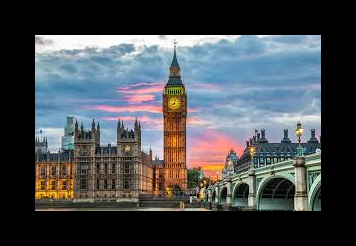

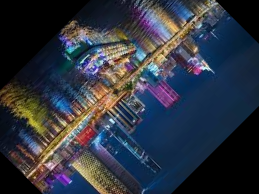

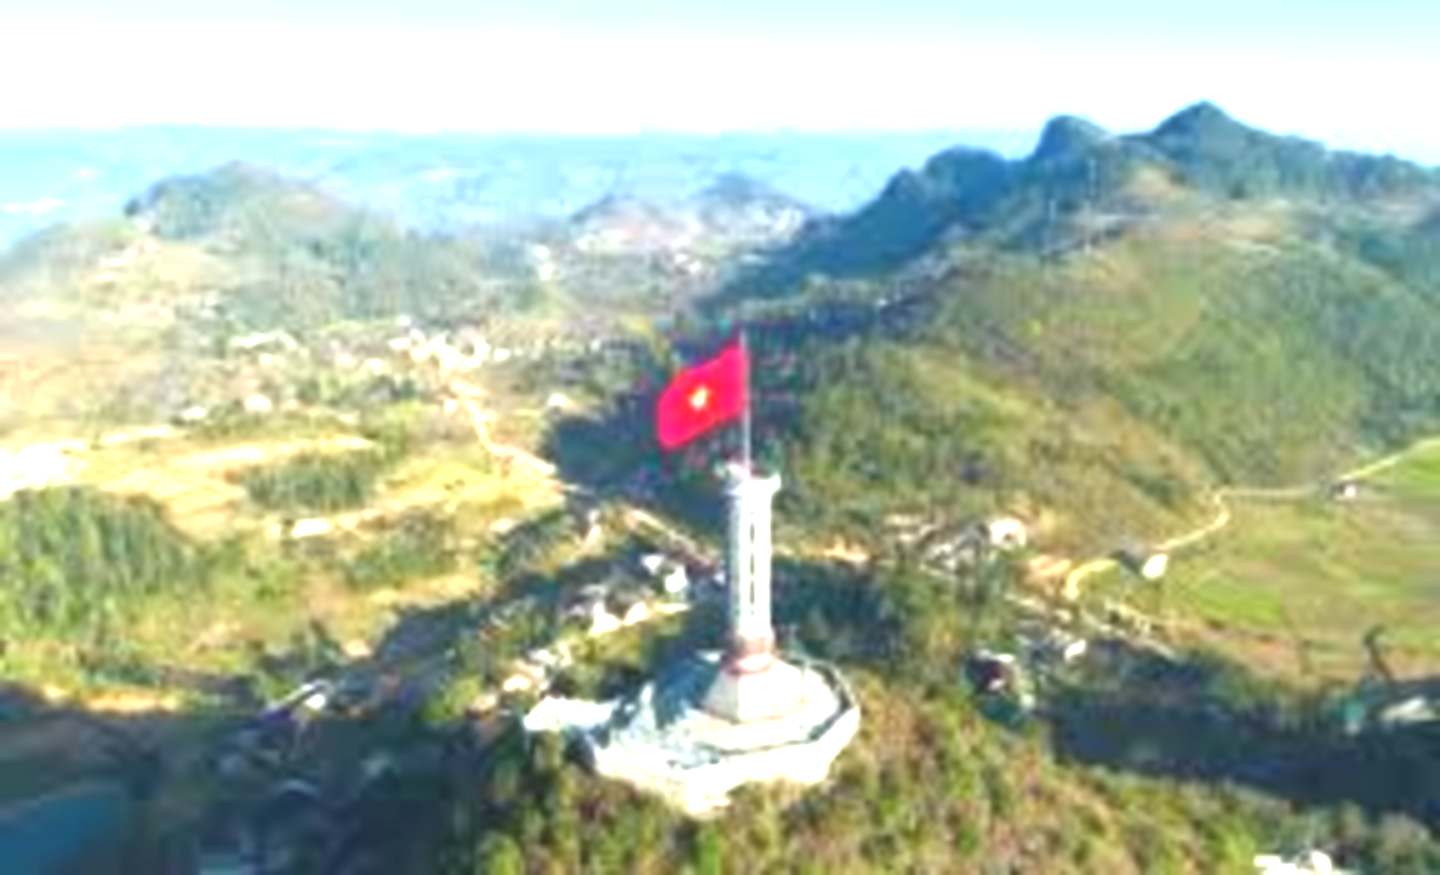

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Đọc 3 ảnh bất kỳ từ file hoặc upload
img1 = cv2.imread('London.jpg')
img2 = cv2.imread('TPHCM.jpg')
img3 = cv2.imread('Vietnam.jpg')

# Kiểm tra ảnh có load thành công không
if img1 is None or img2 is None or img3 is None:
    raise Exception("Một hoặc nhiều ảnh không load được. Kiểm tra đường dẫn.")

# 1. Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh
border_size = 35
img1_padded = cv2.copyMakeBorder(img1, border_size, border_size, border_size, border_size,
                                 cv2.BORDER_CONSTANT, value=[0, 0, 0])

# 2. Xoay ảnh thứ hai 135 độ và lật ngang
(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 135, 1.0)
rotated_img2 = cv2.warpAffine(img2, M, (w, h))
flipped_img2 = cv2.flip(rotated_img2, 1)

# 3. Phóng to ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9
img3_scaled = cv2.resize(img3, None, fx=5.0, fy=5.0, interpolation=cv2.INTER_LINEAR)
img3_blurred = cv2.GaussianBlur(img3_scaled, (9, 9), 0)

# 4. Thay đổi độ sáng và độ tương phản ảnh thứ ba
alpha = 1.5  # hệ số tương phản
beta = 30    # hệ số sáng
img3_adjusted = cv2.convertScaleAbs(img3_blurred, alpha=alpha, beta=beta)

# Hiển thị kết quả trong Colab
cv2_imshow(img1_padded)
cv2_imshow(flipped_img2)
cv2_imshow(img3_adjusted)

# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.